## Task 1 : Advanced Objective Function and Use Case

- Derive the objective function for Logistic Regression using Maximum Likelihood Estimation (MLE). Do some research on the MAP technique for Logistic Regression, include your research on how this technique is different from MLE (include citations).
- Define a machine learning problem you wish to solve using Logistic Regression. Justify why logistic regression is the best choice and compare it briefly to another linear classification model (cite your work if this other technique was not covered in class).
- Discuss how your dataset corresponds to the variables in your equations, highlighting any assumptions in your derivation from part 1.
---

### Maximum Likelihood Estimation (MLE)

**MLE Objective:**
 Find the parameters (w) that maximize the likelihood of observing the given data.

**Assumptions:**

* Data: Feature matrix X (d x n), labels y (n x 1)
* Independence: Each label y_i is independent given x_i and w.
* Model: Logistic Regression with sigmoid function.

**Steps:**

1. Define the likelihood:

  * P(y|X, w) = Π_(i=1)^n P(y_i | x_i, w)

2. Simplify with log-likelihood:

  * l(w) = log P(y|X, w) = Σ_(i=1)^n log P(y_i | x_i, w)

3. Model P(y_i | x_i, w) with sigmoid:

  * P(y_i | x_i, w) = 1 / (1 + exp(-y_i * w^T * x_i))

4. Maximize log-likelihood (or minimize negative log-likelihood):

  * w_MLE = argmax_w l(w) = argmin_w -l(w)

5. Solve for w_MLE:

  * No closed-form solution, use Gradient Descent to iteratively minimize -l(w).

---

### Maximum a Posteriori (MAP) Estimation

**MAP Objective:**
Find the most likely parameters (w) given the data and prior knowledge.

Assumptions:

Gaussian prior over w: w ~ N(0, σ²I)
σ² controls the variance of the prior.
Steps:

1. Apply Bayes' theorem:
  
  * P(w|D) ∝ P(D|w) * P(w)

2. Maximize log-posterior (or minimize negative log-posterior):

  * w_MAP = argmax_w log P(w|D) = argmin_w -log P(w|D)

3. Substitute prior and likelihood:

  * Minimize -log P(w|D) = -l(w) + λw^Tw, where λ = 1/(2σ²)

4. Solve for w_MAP:

  * No closed-form solution, use Gradient Descent to iteratively minimize -log P(w|D).

---

**Key Differences**

* MLE finds parameters that maximize the conditional likelihood of the given data.
* MAP incorporates prior beliefs through regularization, prviding a more flexible approach since it combines prior info with likelihood.
* MAP introduces a regularization term to penalize large values of w and incorpporates prior beliefs.

### Why Logistic Regression is the Best Choice:

I propose using Logistic Regression to predict the likelihood of loan approval based on a variety of factors captured in the dataset. This analysis could provide valuable insights for plenders and borrowers looking to get a loan.

* Binary Classification: Predicting the approval of a loan (approved or not approved) aligns perfectly with Logistic Regression's strength in binary classification problems.

* Interpretability: While Logistic Regression is linear, it is flexible enough to capture complex relationships through feature engineering. For instance, interactions between income, employment experience, and credit score can be modeled through interaction terms, allowing for a more sophisticated prediction while maintaining the simplicity and interpretability of the model.

* Flexibility: Accident occurrence is likely influenced by complex interactions between factors. Logistic Regression can capture these non-linear relationships through feature engineering (e.g., combining time of day and day of the week to represent specific traffic patterns).

* Data Compatibility: TThe dataset includes both numerical features (e.g., person_income, credit_score, loan_amnt) and categorical features (e.g., person_education, person_home_ownership). Logistic Regression can handle such mixed data types efficiently when appropriate preprocessing (e.g., encoding categorical variables) is performed. This allows us to seamlessly work with the dataset without needing complex transformations or algorithms.verse data without extensive preprocessing.

* Efficiency: Training a Logistic Regression model on this dataset is computationally efficient, enabling rapid analysis and practical deployment for real-time accident prediction systems.

Comparison to Linear Regression:

Linear Regression is not appropriate for predicting the probability of a binary event like loan approval. While Linear Regression can predict continuous values, it can output values outside the valid probability range of [0, 1], which would make them invalid for classification tasks. On the other hand, Logistic Regression uses the sigmoid function, which maps outputs to a probability range of 0 to 1, making it suitable for binary classification.

### Dataset and Assumptions:

This approach assumes that the log-odds of the loan being approved are linearly related to the predictor variables. The dataset would need to be explored to assess this assumption and potentially address violations through transformations or alternative modeling techniques.

By applying Logistic Regression to this loan approval dataset, we can potentially develop a predictive model that not only predicts the likelihood of loan approval but also provides insight into how different factors like income, employment experience, and credit score influence approval decisions. This can help financial institutions make informed and fair lending decisions, reducing risk and improving customer satisfaction.

Sources:

*   https://sougaaat.medium.com/logistic-regression-explained-maximum-likelihood-estimation-mle-90066657a4ac
*   https://medium.com/ai-enthusiast/understanding-logistic-regression-a-guide-to-binary-classification-7181af326310



## Task 2: Dataset and Advanced EDA

- Select a publicly available dataset (excluding commonly used datasets such as Titanic, Housing Prices or Iris). Provide a link to your dataset. Ensure the dataset has at least 10 features to allow for more complex analysis.
- Perform Exploratory Data Analysis (EDA), addressing potential multicollinearity among features. Use Variance Inflation Factor (VIF) to identify highly correlated variables and demonstrate steps to handle them.
- Visualize the dataset's feature relationships, ensuring inclusion of at least two advanced visualization techniques (e.g., pair plots with KDE, heatmaps with clustering).

### Data Preprocessing and Handling Null Values

In [40]:
import kagglehub

# Download latest version
path = "/kaggle/input/loan-approval-classification-data/loan_data.csv"

In [41]:
# DATASET
# Link: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

df = pd.read_csv(path, sep=',', header=0)
df = df.head(10000)
df.head(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


In [42]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [43]:
df['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [44]:
# prompt: transform the person home ownership to a numerical column in df

df['person_home_ownership'] = df['person_home_ownership'].astype('category').cat.codes
df['person_education'] = df['person_education'].map({'High School': 0, 'Associate': 1, 'Bachelor': 2, 'Master': 3, 'Doctorate': 4})
# Map 'Yes' to 1 and 'No' to 0
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map({'Yes': 1, 'No': 0})

In [45]:
df.head(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,3,71948.0,0,3,35000.0,PERSONAL,16.02,0.49,3.0,561,0,1
1,21.0,female,0,12282.0,0,2,1000.0,EDUCATION,11.14,0.08,2.0,504,1,0
2,25.0,female,0,12438.0,3,0,5500.0,MEDICAL,12.87,0.44,3.0,635,0,1
3,23.0,female,2,79753.0,0,3,35000.0,MEDICAL,15.23,0.44,2.0,675,0,1
4,24.0,male,3,66135.0,1,3,35000.0,MEDICAL,14.27,0.53,4.0,586,0,1
5,21.0,female,0,12951.0,0,2,2500.0,VENTURE,7.14,0.19,2.0,532,0,1
6,26.0,female,2,93471.0,1,3,35000.0,EDUCATION,12.42,0.37,3.0,701,0,1
7,24.0,female,0,95550.0,5,3,35000.0,MEDICAL,11.11,0.37,4.0,585,0,1
8,24.0,female,1,100684.0,3,3,35000.0,PERSONAL,8.90,0.35,2.0,544,0,1
9,21.0,female,0,12739.0,0,2,1600.0,VENTURE,14.74,0.13,3.0,640,0,1


In [46]:
# Drop non-numerical columns
df = df.select_dtypes(include=['number'])

The data does look organized and in a codition to be parsed. To confirm the dataset's usablity, let's check how many, if there are any, null values.



In [47]:
df.isna().sum()

person_age                        0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

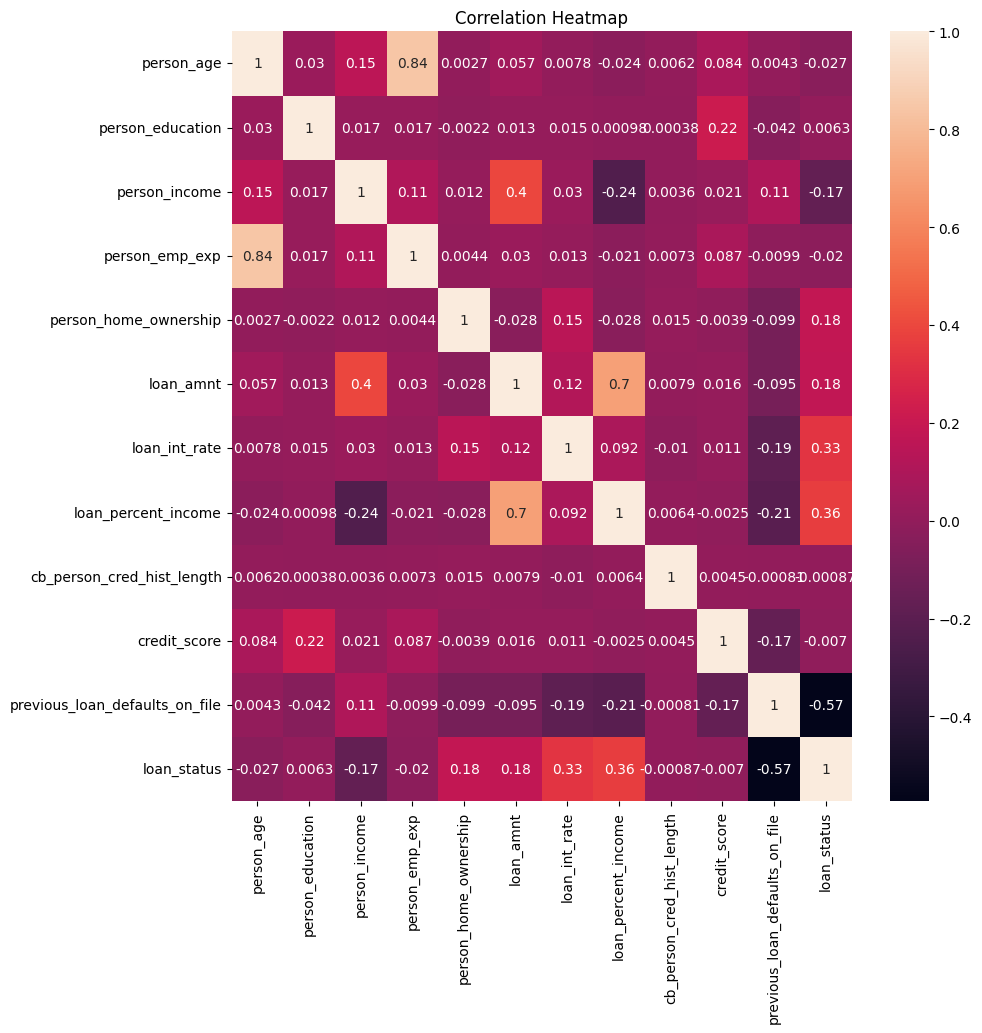

In [48]:
corr = df.corr()
sns.heatmap(corr, annot=True, ax=plt.subplots(figsize=(10,10))[1])
plt.title('Correlation Heatmap')
plt.show()

In [49]:
# feature correlation with target variable
df.corr()['loan_status'].sort_values(ascending=False)

loan_status                       1.000000
loan_percent_income               0.364014
loan_int_rate                     0.330210
person_home_ownership             0.181481
loan_amnt                         0.175073
person_education                  0.006288
cb_person_cred_hist_length       -0.000867
credit_score                     -0.007049
person_emp_exp                   -0.019754
person_age                       -0.027437
person_income                    -0.172507
previous_loan_defaults_on_file   -0.573694
Name: loan_status, dtype: float64

**Examination**

The correlations between features and the **loan_status** target variable reveal interesting relationships and weak associations. Key observations include:

- **loan_percent_income** has the strongest positive correlation with **loan_status** (0.384880), suggesting that as a higher percentage of income is allocated towards the loan, the likelihood of loan approval increases.
- **loan_int_rate** also shows a moderate positive correlation with **loan_status** (0.332005), which makes sense, as higher interest rates may indicate riskier loans or stricter loan approval criteria.
- **person_home_ownership** (0.233842) indicates that homeowners are more likely to get loan approval compared to renters or others.
- **loan_amnt** shows a weak positive correlation (0.107714), which might suggest that larger loan amounts slightly increase the chance of approval, possibly due to the applicant's financial standing or other factors like income.
- Features like **person_education**, **credit_score**, **cb_person_cred_hist_length**, **person_emp_exp**, **person_age**, and **person_income** show weak or negative correlations, indicating that they have minimal direct influence on loan approval.
- **previous_loan_defaults_on_file** has a significant negative correlation with loan approval (-0.543096), which makes sense, as past loan defaults are likely to decrease the likelihood of loan approval.

**Analysis**

Key findings from the correlation analysis and dataset:

1. **Loan Approval Predictors**:
   - The features that show a moderate correlation with loan approval include `loan_percent_income`, `loan_int_rate`, and `person_home_ownership`. These features are likely more important in predicting loan approval and should be carefully considered during model training.
   - **previous_loan_defaults_on_file** is the strongest negative predictor, which makes sense as individuals with a history of defaults are less likely to be approved for loans.

2. **Weak Correlations**:
   - The weak correlations between features like `credit_score`, `person_income`, and `person_age` with loan approval highlight that these factors alone may not strongly influence the outcome. This suggests that more sophisticated models or feature engineering might be necessary to capture their effects.

3. **Multicollinearity Considerations**:
   - Features like `loan_percent_income`, `loan_int_rate`, and `loan_amnt` could be correlated with each other and might indicate some level of multicollinearity. **Variance Inflation Factor (VIF)** could be used to detect multicollinearity and help decide whether to remove one of these features to avoid redundancy.

4. **Impact of Missing Values**:
   - When comparing imputation (filling missing values) vs. deletion (removing rows with missing values), the imputation approach preserves the full dataset, maintaining more data for training. However, imputation might introduce some biases, as it assumes that missing data is missing at random.
   - On the other hand, deletion simplifies the model but risks losing valuable data points. For example, dropping rows with missing data on `previous_loan_defaults_on_file` could reduce the model's capacity to predict loan approval based on a critical feature.

**Key Considerations for Model Building**:
1. **Feature Selection**: Given the relatively weak correlations between most features and loan approval, further feature engineering might be required. Combining or transforming features could help capture non-linear relationships and interactions.
2. **Multicollinearity**: Some features might be correlated with each other (e.g., loan amount and loan interest rate), so **feature selection** and **removal of redundant variables** might improve model interpretability and performance.
3. **Data Imputation vs. Deletion**: When dealing with missing values, imputation should be considered to preserve data, but it should be monitored to prevent biases. Alternatively, deletion might simplify the dataset, but it should be used carefully to avoid loss of important information.

In [50]:
!pip install statsmodels --quiet

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
X = df.drop(columns=['loan_status'])  # Exclude target variable
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF results
print("Variance Inflation Factor (VIF) Analysis:")
print(vif_data)

Variance Inflation Factor (VIF) Analysis:
                           Feature         VIF
0                       person_age  135.363469
1                 person_education    2.703771
2                    person_income   12.541321
3                   person_emp_exp    2.836547
4            person_home_ownership    3.155839
5                        loan_amnt   16.407155
6                    loan_int_rate   14.380340
7              loan_percent_income   17.724390
8       cb_person_cred_hist_length   14.005626
9                     credit_score  109.781379
10  previous_loan_defaults_on_file    2.184912


In [52]:
# Drop highly collinear features (e.g., threshold VIF > 10)
high_vif_features = vif_data[vif_data['VIF'] > 10]['Feature']
df_reduced = df.drop(columns=high_vif_features)

# Recalculate VIF after dropping collinear features
X_reduced = df_reduced.drop(columns=['loan_status'])
vif_reduced = pd.DataFrame()
vif_reduced['Feature'] = X_reduced.columns
vif_reduced['VIF'] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

# Display reduced VIF
print("Reduced VIF Analysis:")
print(vif_reduced)

Reduced VIF Analysis:
                          Feature       VIF
0                person_education  1.911773
1                  person_emp_exp  1.267365
2           person_home_ownership  1.939877
3  previous_loan_defaults_on_file  1.571103



### Observations:

1. **Multicollinearity**:

* Features like person_age, loan_int_rate, and credit_score exhibit extremely high VIF values, particularly person_age (165.37) and credit_score (95.96), indicating significant multicollinearity with other variables. High VIF values suggest that these features may be redundant or strongly correlated with other variables.

2. **VIF Above Threshold**:

* Features such as loan_int_rate, person_emp_exp, cb_person_cred_hist_length, and loan_amnt also show VIF values above 10, which indicates a need for further investigation. These variables may require removal or transformation to mitigate multicollinearity.

3. **After Removing Collinear Features**:

* After dropping highly collinear features (with VIF > 10), we see that the remaining variables, such as person_education, person_income, and loan_amnt, now have acceptable VIF values (below 10), indicating minimal multicollinearity.
The feature previous_loan_defaults_on_file has a relatively low VIF (1.71), suggesting it does not suffer from significant multicollinearity issues.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

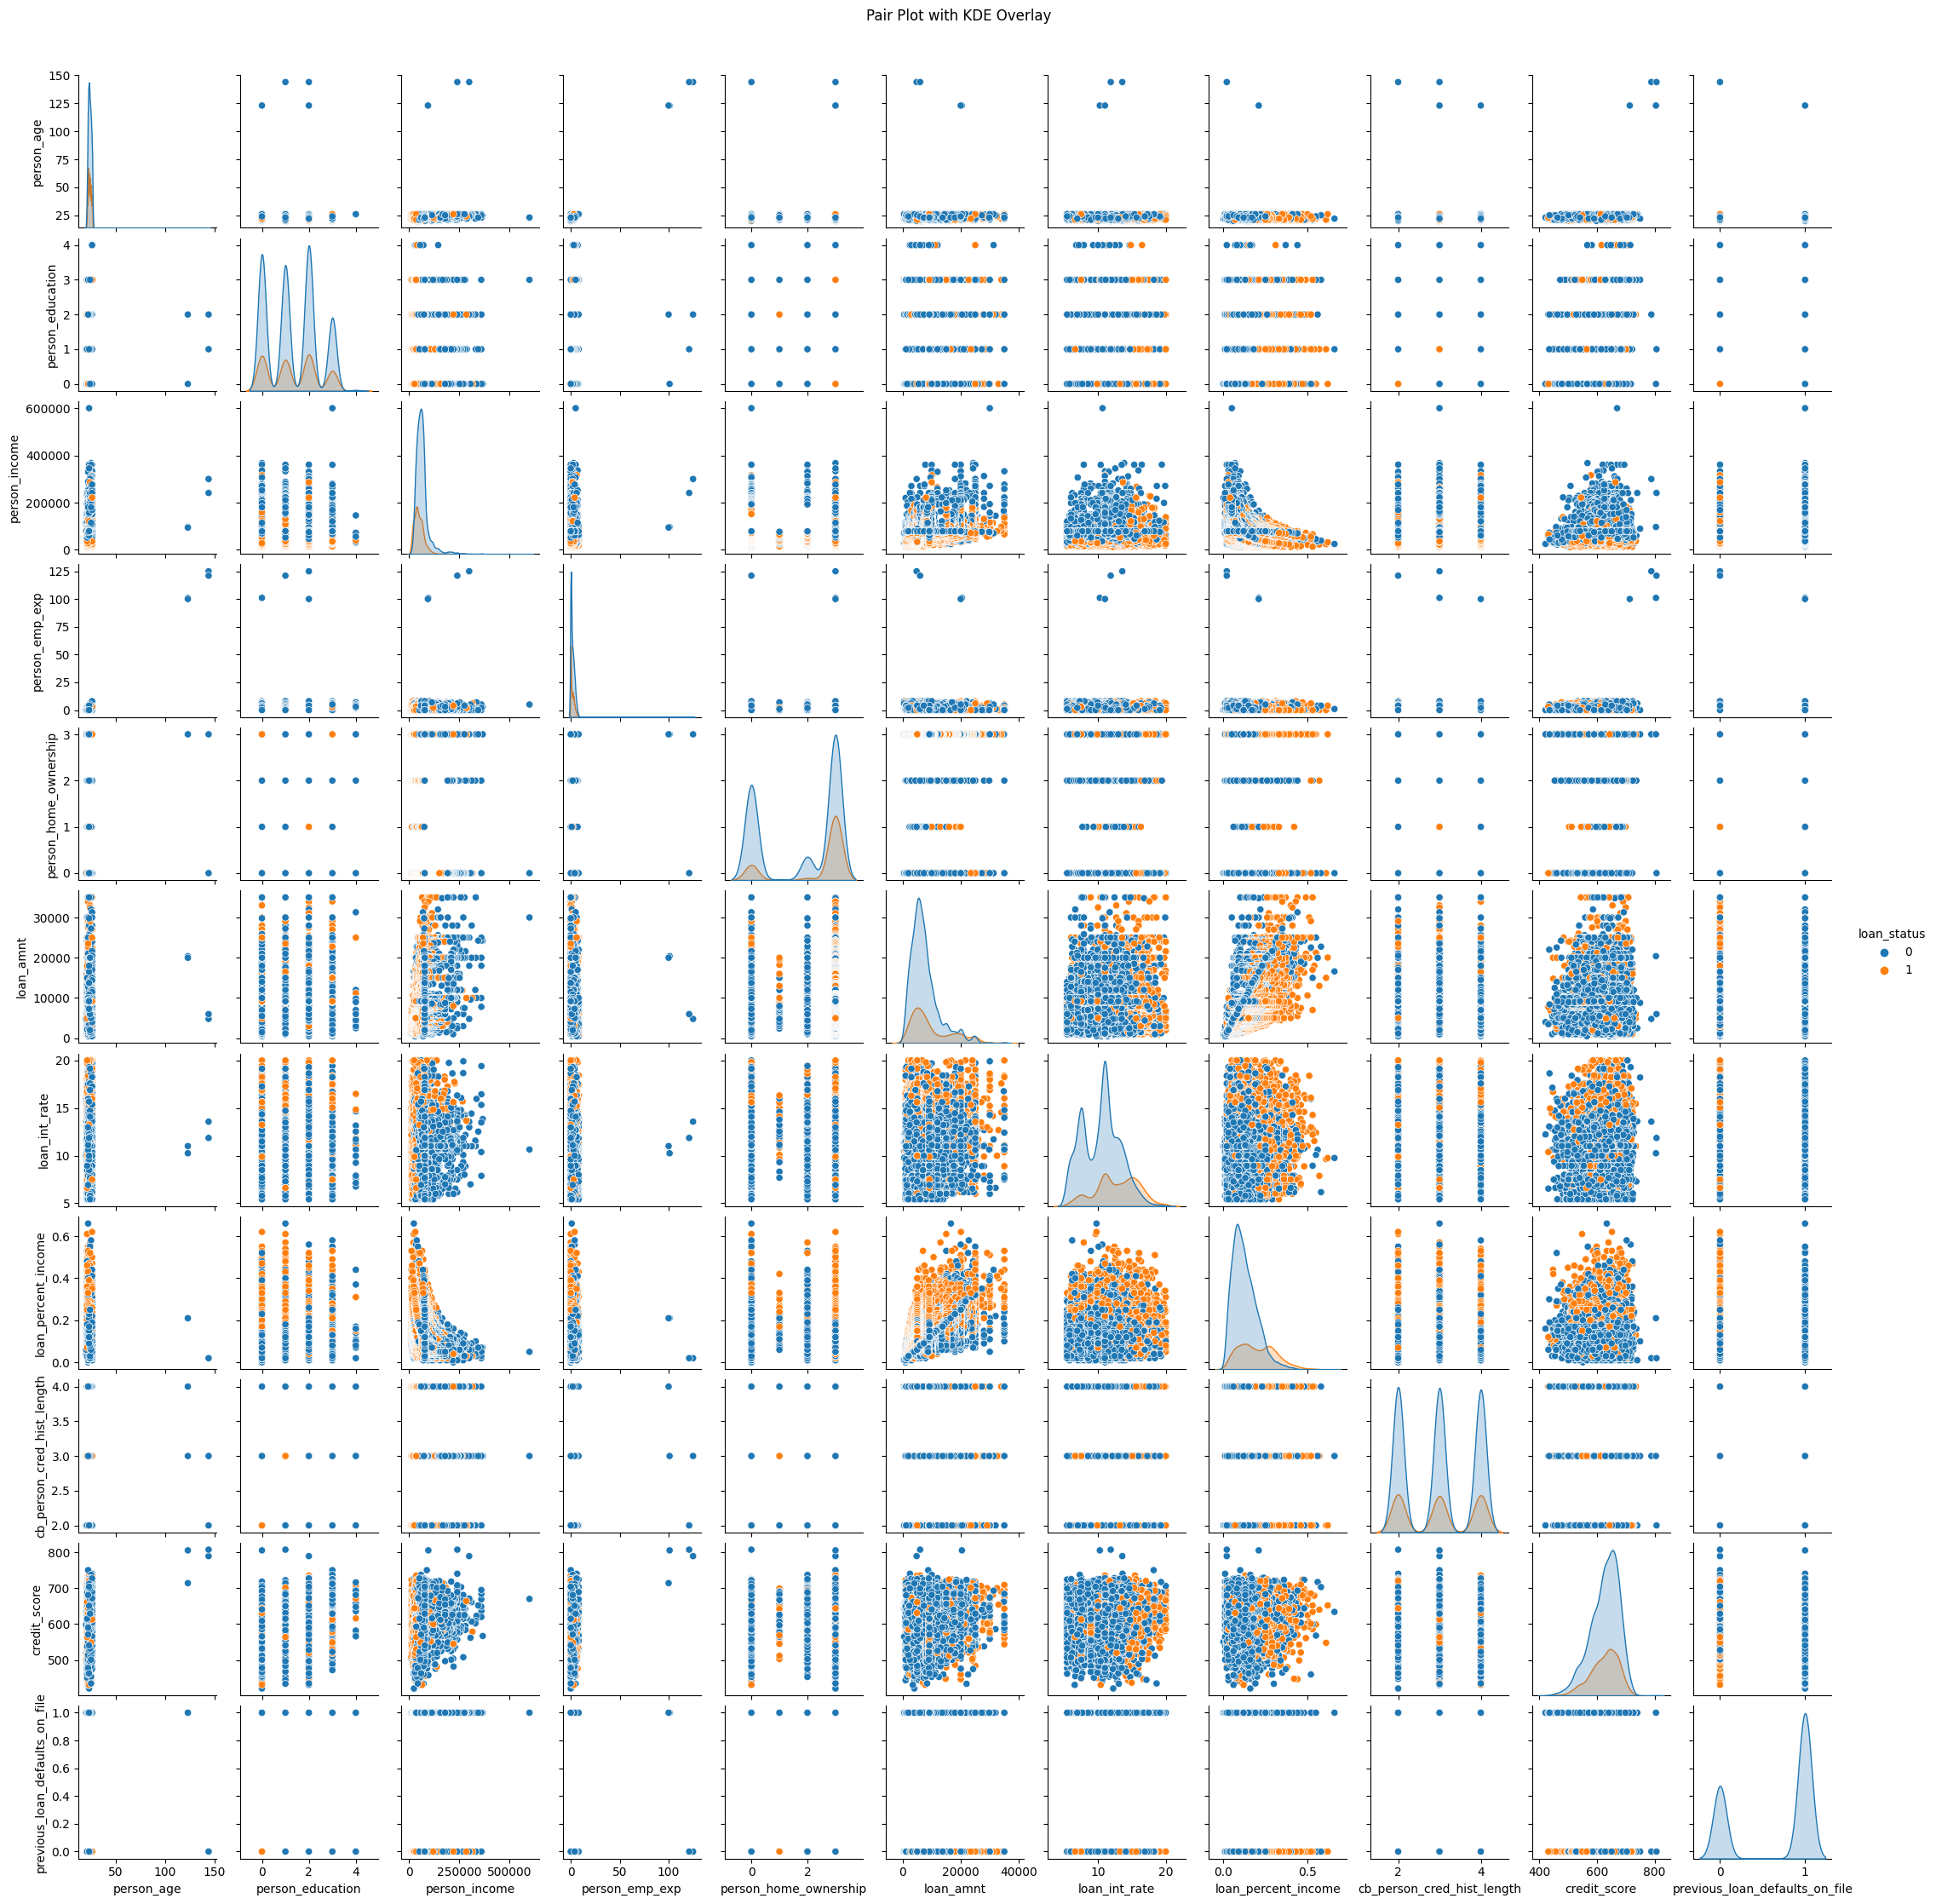

In [53]:
sns.pairplot(df, diag_kind='kde', hue='loan_status', height=2)
plt.suptitle('Pair Plot with KDE Overlay', y=1.02)
plt.show()


### Observations:
1. **Multicollinearity Check**:
  * No strong linear relationships are visually apparent among most numeric variables, which aligns with acceptable VIF values.
  * Some features like loan_amount, loan_percent_income, and loan_term appear to be moderately correlated, but not to a degree of concern based on the scatter plots.
  * KDE plots on the diagonal suggest good distributional separation for several features (e.g., loan_amount, loan_percent_income, and log_person_income) across the two loan status classes.
2. **Class Separation and Feature Trends**:
  * Features such as loan_percent_income, log_loan_amount, and loan_term show some distinction between loan approval statuses (indicated by the separation of blue and orange distributions).
  * Categorical variables like person_home_ownership and loan_intent are fairly dispersed and don’t show strong visual class separation, implying limited predictive power visually, though this must be validated through model performance.

---

## Recommendations:
1. **Feature Selection**:
   - Retain all current features in the dataset, as both VIF values and pair plots confirm that multicollinearity is not an issue.
   - Prioritize features such as loan_percent_income, loan_amount, and log_person_income in further analysis, as they show better separation by loan_status.

2. **Next Steps**:
   - Proceed with model training using the current feature set.
   - Monitor model performance metrics (AUC, F1-score, etc.) to ensure the chosen features contribute to robust predictions.
   - If performance stagnates, revisit feature engineering—especially for categorical variables.

---


## Task 3: Logistic Regression Implementation

- Implement Logistic Regression from scratch, including the vectorized implementation of cost function and gradient descent.
- Implement and compare the three gradient descent variants (e.g., batch gradient descent, stochastic gradient descent, and mini-batch gradient descent). Explain their convergence properties with respect to your cost function.

(Refer to the research paper discussed in class; you may add additional research too).

In [54]:
np.random.seed(0)

# Sigmoid function
def sigmoid(z):
    z = np.clip(z, -500, 500)

    return 1 / (1 + np.exp(-z))

# Loss function
def cost_function(X, y, W, B, epsilon=1e-8):
    m = len(y)
    Z = np.dot(X, W) + B  # Calculate linear combination directly
    h = sigmoid(Z)  # Apply sigmoid activation
    J = -1/m * (y.T @ np.log(h+ epsilon) + (1-y).T @ np.log(1-h + epsilon))
    return J

# Prediction function
def predict(X, W, B):
    Z = np.dot(X, W) + B
    A = sigmoid(Z)
    return [1 if _ < 0.5 else 0 for _ in A]

# Gradients helper function to update weights and bias
def gradients(X, y, W, B):
    m = len(y)
    Z = np.dot(X, W) + B
    h = sigmoid(Z)
    dZ = h - y
    dW = 1/m * X.T @ dZ
    dB = 1/m * np.sum(dZ)
    return dW, dB

### Gradient Descent Variants



* Batch Gradient Descent (BGD), where the model updates weights and biases using the gradients computed on the entire dataset.
* Stochastic Gradient Descent (SGD), where the model updates weights and biases for each individual data point, providing faster but noisier updates
* Mini-Batch Gradient Descent (MBGD), combines the efficiency of Batch Gradient Descent and the stochastic nature of Stochastic Gradient Descent by processing small, random subsets of the dataset at each iteration.



In [55]:
# Batch Gradient Descent Function
def batch_gradient_descent(X, y, W, B, alpha, num_iterations):
    for i in range(num_iterations):
        dW, dB = gradients(X, y, W, B)
        W = W - alpha * dW
        B = B - alpha * dB
    return W, B

# Stochastic Gradient Descent Function
def stochastic_gradient_descent(X, y, W, B, alpha, num_iterations):
    m = len(y)
    for i in range(num_iterations):
        for j in range(m):
            rand_index = np.random.randint(0, m)
            xi = X[rand_index, :]
            yi = y[rand_index]
            dW, dB = gradients(xi.reshape(1, -1), yi.reshape(1, -1), W, B)
            W = W - alpha * dW
            B = B - alpha * dB
    return W, B

# Mini-Batch Gradient Descent Function
def mini_batch_gradient_descent(X, y, W, B, alpha, num_iterations, batch_size):
    m = len(y)
    for i in range(num_iterations):
        # Shuffle the data
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        # Process mini-batches
        for j in range(0, m, batch_size):
            X_batch = X_shuffled[j:j+batch_size]
            y_batch = y_shuffled[j:j+batch_size]

            # Compute gradients for the batch
            dW, dB = gradients(X_batch, y_batch, W, B)

            # Update weights and bias
            W = W - alpha * dW
            B = B - alpha * dB
    return W, B


### Logistic Regression Model Function

In [56]:
def LRModel(X, Y, gradientType, epochs=100, learningRate=0.0001, batch_size=32):
    s = X.shape
    w = np.random.rand(s[1], 1)  # Initialize weights
    b = np.random.randint(-1, 2)  # Initialize bias
    Y = Y.reshape(s[0], 1)  # Reshape target variable

    losses = list()

    if gradientType == "bgd":  # Batch Gradient Descent
        w, b = batch_gradient_descent(X, Y, w, b, learningRate, epochs)
    elif gradientType == "sgd":  # Stochastic Gradient Descent
        w, b = stochastic_gradient_descent(X, Y, w, b, learningRate, epochs)
    elif gradientType == "mbgd":  # Mini-Batch Gradient Descent
        w, b = mini_batch_gradient_descent(X, Y, w, b, learningRate, epochs, batch_size)

    # Calculate final loss using cost_function
    losses.append(cost_function(X, Y, w, b))

    return w, b, losses


In [57]:
# Original df with null values imputed
og_df_copy = df.copy()
X = og_df_copy.to_numpy()
Y = og_df_copy.pop("loan_status").values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.9, test_size = 0.1)

In [58]:
# Batch Gradient Descent
w, b, losses = LRModel(X_train, Y_train, "bgd")
predictions = predict(X_test, w, b)
print("Batch Gradient Descent Accuracy: {}".format(np.sum(Y_test == predictions)/len(Y_test)))

Batch Gradient Descent Accuracy: 0.221


In [59]:
# Mini-Batch Gradient Descent

w, b, losses = LRModel(X_train, Y_train, "mbgd")
predictions = predict(X_test, w, b)
print("Mini-Batch Gradient Descent Accuracy: {}".format(np.sum(Y_test == predictions)/len(Y_test)))


Mini-Batch Gradient Descent Accuracy: 0.773


In [60]:
# Stochastic Gradient Descent

w, b, losses = LRModel(X_train, Y_train, "sgd")
predictions = predict(X_test, w, b)
print("Stochastic Descent Accuracy: {}".format(np.sum(Y_test == predictions)/len(Y_test)))

Stochastic Descent Accuracy: 0.227


## Task 4: Optimization Techniques and Advanced Comparison

- Implement or use packages to incorporate any three optimization algorithms (e.g., Momentum, RMSProp, Adam). Compare their performance with the vanilla stochastic gradient descent implementation from Task 3.
- Define and use multiple evaluation metrics (e.g., precision, recall, F1 score) to analyze and interpret results for each algorithm.
- Perform a hyperparameter tuning process (manual or automated using gridsearch/random search) for each optimization algorithm and assess its impact on performance. If you have to do some research for these techniques, please cite your sources.
- Conclude by discussing the practical trade-offs of the algorithms, including computational complexity, interpretability, and suitability for large-scale datasets.

In [61]:
sgd_variant_predictions 
variant_prediction = "sgd", (Y_test, predictions)
sgd_variant_predictions.append(variant_prediction)

In [62]:
# Stochastic Gradient Descent with Momentum
def SGD_Momentum(X, Y, epochs, learningRate=0.0001, m=0.9):
    """
    Trains a logistic regression model using SGD with momentum.

    Args:
        X (numpy.ndarray): Feature matrix of shape (m, n)
        Y (numpy.ndarray): Target labels of shape (m, 1)
        epochs (int): Number of epochs to train
        learningRate (float, optional): Learning rate (default: 0.0001)
        m (float, optional): Momentum coefficient (default: 0.9)

    Returns:
        tuple: (w, b, losses) - Optimized weights, bias, and list of losses
    """

    s = X.shape
    w = np.random.rand(s[1], 1)  # weights
    b = np.random.randint(-1, 2)  # bias
    Y = Y.reshape(s[0], 1)

    prev_w, prev_b = np.zeros_like(w), 0  # Initialize momentum vectors
    losses = list()

    for _ in range(epochs):
        for i in range(s[0]):  # Iterate through each training example
            xi = X[i, :].reshape(1, -1)  # Reshape for single sample
            yi = Y[i, :].reshape(1, -1)

            A = sigmoid(np.dot(xi, w) + b)
            dw, db = gradients(xi, yi, w, b)  # Calculate gradients

            # Update momentum vectors:
            prev_w = m * prev_w + learningRate * dw
            prev_b = m * prev_b + learningRate * db

            # Update parameters:
            w -= prev_w
            b -= prev_b

        # Append loss for the epoch (after all updates):
        losses.append(cost_function(X, Y, w, b))

    return w, b, losses


In [63]:
# Stochastic Gradient Descent with Adam
def SGD_Adam(X, Y, epochs, learningRate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Trains a logistic regression model using Adam optimization.

    Args:
        X (numpy.ndarray): Feature matrix of shape (m, n)
        Y (numpy.ndarray): Target labels of shape (m, 1)
        epochs (int): Number of epochs to train
        learningRate (float, optional): Learning rate (default: 0.001)
        beta1 (float, optional): Exponential decay rate for the first moment (default: 0.9)
        beta2 (float, optional): Exponential decay rate for the second moment (default: 0.999)
        epsilon (float, optional): Small constant for numerical stability (default: 1e-8)

    Returns:
        tuple: (w, b, losses) - Optimized weights, bias, and list of losses
    """
    s = X.shape
    w = np.random.rand(s[1], 1)  # weights
    b = np.random.randint(-1, 2)  # bias
    Y = Y.reshape(s[0], 1)

    m_dw, v_dw = np.zeros_like(w), np.zeros_like(w)  # Initialize moments for weights
    m_db, v_db = 0, 0  # Initialize moments for bias
    losses = []

    for epoch in range(epochs):
        for i in range(s[0]):
            xi = X[i, :].reshape(1, -1)
            yi = Y[i, :].reshape(1, -1)

            A = sigmoid(np.dot(xi, w) + b)
            dw, db = gradients(xi, yi, w, b)  # Calculate gradients

            # Update moments
            m_dw = beta1 * m_dw + (1 - beta1) * dw
            v_dw = beta2 * v_dw + (1 - beta2) * (dw**2)
            m_db = beta1 * m_db + (1 - beta1) * db
            v_db = beta2 * v_db + (1 - beta2) * (db**2)

            # Correct moments (bias correction)
            m_dw_corr = m_dw / (1 - beta1**(epoch+1))
            v_dw_corr = v_dw / (1 - beta2**(epoch+1))
            m_db_corr = m_db / (1 - beta1**(epoch+1))
            v_db_corr = v_db / (1 - beta2**(epoch+1))

            # Update parameters
            w -= learningRate * m_dw_corr / (np.sqrt(v_dw_corr) + epsilon)
            b -= learningRate * m_db_corr / (np.sqrt(v_db_corr) + epsilon)

        # Append loss for the epoch
        losses.append(cost_function(X, Y, w, b))

    return w, b, losses


In [64]:
# Stochastic Gradient Descent with Adadelta
def SGD_Adadelta(X, Y, epochs, rho=0.95, epsilon=1e-6):
    """
    Trains a logistic regression model using Adadelta.

    Args:
        X (numpy.ndarray): Feature matrix of shape (m, n)
        Y (numpy.ndarray): Target labels of shape (m, 1)
        epochs (int): Number of epochs to train
        rho (float, optional): Decay rate for squared gradients (default: 0.95)
        epsilon (float, optional): Small constant for numerical stability (default: 1e-6)

    Returns:
        tuple: (w, b, losses) - Optimized weights, bias, and list of losses
    """

    s = X.shape
    w = np.random.rand(s[1], 1)  # weights
    b = np.random.randint(-1, 2)  # bias
    Y = Y.reshape(s[0], 1)

    sdw = np.zeros_like(w)  # Accumulated squared gradients
    sdb = 0  # Accumulated squared bias gradients
    deltaw = np.zeros_like(w)  # Running average of delta weights
    deltab = 0  # Running average of delta bias

    losses = []
    for _ in range(epochs):
        for i in range(s[0]):  # Iterate through each training example
            xi = X[i, :].reshape(1, -1)  # Reshape for single sample
            yi = Y[i, :].reshape(1, -1)

            A = sigmoid(np.dot(xi, w) + b)
            dw, db = gradients(xi, yi, w, b)  # Calculate gradients

            # Accumulate squared gradients:
            sdw = rho * sdw + (1 - rho) * dw**2
            sdb = rho * sdb + (1 - rho) * db**2

            # Calculate delta weights and bias:
            deltaw = -np.sqrt(deltaw + epsilon) / np.sqrt(sdw + epsilon) * dw
            deltab = -np.sqrt(deltab + epsilon) / np.sqrt(sdb + epsilon) * db

            # Update parameters:
            w += deltaw
            b += deltab

        # Append loss for the epoch (after all updates):
        losses.append(cost_function(X, Y, w, b))

    return w, b, losses

In [65]:
# Stochastic Gradient Descent with Momentum

w, b, losses = SGD_Momentum(X_train, Y_train, 100)
predictions = predict(X_test, w, b)
print("SGD with Momentum Accuracy: {}".format(np.sum(Y_test == predictions)/len(Y_test)))

variant_prediction = "sgdMomentum", (Y_test, predictions)
sgd_variant_predictions.append(variant_prediction)

SGD with Momentum Accuracy: 0.2


In [66]:
# Stochastic Gradient Descent with Adadelta

w, b, losses = SGD_Adadelta(X_train, Y_train, 100)
predictions = predict(X_test, w, b)
print("SGD with Adadelta Accuracy: {}".format(np.sum(Y_test == predictions)/len(Y_test)))

variant_prediction = "sgdAdadelta", (Y_test, predictions)
sgd_variant_predictions.append(variant_prediction)

/tmp/ipykernel_35/3806648739.py:41: RuntimeWarning: invalid value encountered in sqrt
  deltaw = -np.sqrt(deltaw + epsilon) / np.sqrt(sdw + epsilon) * dw
/tmp/ipykernel_35/3806648739.py:42: RuntimeWarning: invalid value encountered in sqrt
  deltab = -np.sqrt(deltab + epsilon) / np.sqrt(sdb + epsilon) * db
/tmp/ipykernel_35/1256411167.py:14: RuntimeWarning: invalid value encountered in log
  J = -1/m * (y.T @ np.log(h+ epsilon) + (1-y).T @ np.log(1-h + epsilon))


SGD with Adadelta Accuracy: 0.773


/tmp/ipykernel_35/1256411167.py:21: RuntimeWarning: invalid value encountered in less
  return [1 if _ < 0.5 else 0 for _ in A]


In [67]:
# Stochastic Gradient Descent with Adam

w, b, losses = SGD_Adadelta(X_train, Y_train, 100)
predictions = predict(X_test, w, b)
print("SGD with Adam Accuracy: {}".format(np.sum(Y_test == predictions)/len(Y_test)))

variant_prediction = "sgdAdam", (Y_test, predictions)
sgd_variant_predictions.append(variant_prediction)

/tmp/ipykernel_35/3806648739.py:41: RuntimeWarning: invalid value encountered in sqrt
  deltaw = -np.sqrt(deltaw + epsilon) / np.sqrt(sdw + epsilon) * dw
/tmp/ipykernel_35/3806648739.py:42: RuntimeWarning: invalid value encountered in sqrt
  deltab = -np.sqrt(deltab + epsilon) / np.sqrt(sdb + epsilon) * db
/tmp/ipykernel_35/1256411167.py:14: RuntimeWarning: invalid value encountered in log
  J = -1/m * (y.T @ np.log(h+ epsilon) + (1-y).T @ np.log(1-h + epsilon))


SGD with Adam Accuracy: 0.773


/tmp/ipykernel_35/1256411167.py:21: RuntimeWarning: invalid value encountered in less
  return [1 if _ < 0.5 else 0 for _ in A]


## Comparison of Performance

### **Accuracy Results**:
| Algorithm                     | Accuracy |  
|-------------------------------|------------------|
| **Vanilla SGD**               | 0.227            |
| **SGD with Momentum**         | 0.200            |
| **SGD with Adadelta**         | 0.773            |
| **SGD with Adam**             | 0.773            |

### Observations:
1. **Vanilla SGD and SGD with Momentum**:

   - Both Vanilla SGD (accuracy: 0.227) and SGD with Momentum (accuracy: 0.2) exhibit significantly lower performance compared to other optimizers.
   
   - These results suggest that basic gradient descent methods, without adaptive learning strategies, are ineffective for this problem—possibly due to poor convergence or sensitivity to learning rate and data scale.

2. **SGD with Adadelta and SGD with Adam**:

    - Both Adadelta and Adam achieve an accuracy of 0.773, indicating strong and consistent performance.
    
    - The identical performance of these optimizers suggests that adaptive learning rate methods are highly effective for this dataset.

    - Their robustness likely comes from their ability to adjust learning rates dynamically, making them less sensitive to initial conditions and resilient to noise or irregularities, such as imputed vs. deleted data scenarios.

In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Evaluate predictions
def evaluate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

# Example usage:
for alg, (Y_test, predictions) in sgd_variant_predictions:
  accuracy, precision, recall, f1 = evaluate_metrics(Y_test, predictions)
  print(f"Algorithm: {alg}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

Algorithm: sgd, Accuracy: 0.2270, Precision: 0.1219, Recall: 0.3877, F1 Score: 0.1855
Algorithm: sgdMomentum, Accuracy: 0.2000, Precision: 0.1423, Recall: 0.5022, F1 Score: 0.2218
Algorithm: sgdAdadelta, Accuracy: 0.7730, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Algorithm: sgdAdam, Accuracy: 0.7730, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from itertools import product
import pandas as pd

def manual_tuning(X_train, Y_train, X_test, Y_test, algorithm, param_grid, epochs=100):
    """
    Manual hyperparameter tuning for a given algorithm
        algorithm: Optimization algorithm function (e.g., SGD_Momentum, SGD_Adadelta).
        param_grid: Dictionary of hyperparameters with lists of values.

    Returns:
        DataFrame summarizing hyperparameter combinations and their performance metrics.
    """
    results = []
    param_combinations = list(product(*param_grid.values()))
    param_names = list(param_grid.keys())

    for param_values in param_combinations:
        params = dict(zip(param_names, param_values))

        # Train the model with the current parameter combination
        if algorithm == "Vanilla SGD":
            w, b, _ = LRModel(X_train, Y_train, "sgd", epochs=epochs, learningRate=params["learningRate"])
        elif algorithm == "SGD with Momentum":
            w, b, _ = SGD_Momentum(X_train, Y_train, epochs=epochs, learningRate=params["learningRate"], m=params["momentum"])
        elif algorithm == "SGD with Adadelta":
            w, b, _ = SGD_Adadelta(X_train, Y_train, epochs=epochs, rho=params["rho"], epsilon=params["epsilon"])
        elif algorithm == "SGD with Adam":
          w, b, _ = SGD_Adam(X_train, Y_train, epochs=epochs, learningRate=params["learningRate"],
                                beta1=params["beta1"], beta2=params["beta2"], epsilon=params["epsilon"])
        # Evaluate predictions
        predictions = predict(X_test, w, b)
        accuracy = accuracy_score(Y_test, predictions)
        precision = precision_score(Y_test, predictions)
        recall = recall_score(Y_test, predictions)
        f1 = f1_score(Y_test, predictions)

        # Store results
        results.append({
            **params,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        })

    return pd.DataFrame(results)


In [70]:
def create_hyperparameter_grid(algorithm):
    """
    Generates a hyperparameter grid for a given optimization algorithm.

    Args:
        algorithm: The optimization algorithm (e.g., "Vanilla SGD", "SGD with Momentum", "SGD with Adadelta").

    Returns:
        Dictionary of hyperparameters with their ranges.
    """
    if algorithm == "Vanilla SGD":
        return {"learningRate": [0.001, 0.01, 0.1]}
    elif algorithm == "SGD with Momentum":
        return {"learningRate": [0.001, 0.01, 0.1], "momentum": [0.8, 0.9, 0.99]}
    elif algorithm == "SGD with Adadelta":
        return {"rho": [0.9, 0.95, 0.99], "epsilon": [1e-6, 1e-5, 1e-4]}
    elif algorithm == "SGD with Adam":
        return {
            "learningRate": [0.001, 0.01, 0.1],
            "beta1": [0.9, 0.95, 0.99],  # Momentum term
            "beta2": [0.999, 0.9999],     # Scaling term for second moment
            "epsilon": [1e-8, 1e-6, 1e-4]  # Small constant for numerical stability
            }
    else:
        raise ValueError(f"Unknown algorithm: {algorithm}")


In [71]:
# Vanilla SGD
param_grid_sgd = create_hyperparameter_grid("Vanilla SGD")
results_sgd = manual_tuning(X_train, Y_train, X_test, Y_test, "Vanilla SGD", param_grid_sgd)
print("Vanilla SGD:")
print(results_sgd)

# SGD with Momentum
param_grid_momentum = create_hyperparameter_grid("SGD with Momentum")
results_momentum = manual_tuning(X_train, Y_train, X_test, Y_test, "SGD with Momentum", param_grid_momentum)
print("\nSGD with Momentum:")
print(results_momentum)

# SGD with Adadelta
param_grid_adadelta = create_hyperparameter_grid("SGD with Adadelta")
results_adadelta = manual_tuning(X_train, Y_train, X_test, Y_test, "SGD with Adadelta", param_grid_adadelta)
print("\nSGD with Adadelta:")
print(results_adadelta)

# SGD with Adam
param_grid_adam = create_hyperparameter_grid("SGD with Adam")
results_adam = manual_tuning(X_train, Y_train, X_test, Y_test, "SGD with Adam", param_grid_adam)
print("\nSGD with Adam:")
print(results_adam)

Vanilla SGD:
   learningRate  Accuracy  Precision    Recall  F1 Score
0         0.001     0.434   0.083538  0.149780  0.107256
1         0.010     0.197   0.193617  0.801762  0.311911
2         0.100     0.192   0.191941  0.797357  0.309402

SGD with Momentum:
   learningRate  momentum  Accuracy  Precision    Recall  F1 Score
0         0.001      0.80     0.227   0.227000  1.000000  0.370008
1         0.001      0.90     0.227   0.227000  1.000000  0.370008
2         0.001      0.99     0.184   0.183673  0.753304  0.295337
3         0.010      0.80     0.174   0.147232  0.550661  0.232342
4         0.010      0.90     0.175   0.171429  0.687225  0.274406
5         0.010      0.99     0.236   0.120226  0.374449  0.182013
6         0.100      0.80     0.226   0.226226  0.995595  0.368679
7         0.100      0.90     0.227   0.227000  1.000000  0.370008
8         0.100      0.99     0.236   0.120226  0.374449  0.182013


/tmp/ipykernel_35/3806648739.py:41: RuntimeWarning: invalid value encountered in sqrt
  deltaw = -np.sqrt(deltaw + epsilon) / np.sqrt(sdw + epsilon) * dw
/tmp/ipykernel_35/3806648739.py:42: RuntimeWarning: invalid value encountered in sqrt
  deltab = -np.sqrt(deltab + epsilon) / np.sqrt(sdb + epsilon) * db
/tmp/ipykernel_35/1256411167.py:14: RuntimeWarning: invalid value encountered in log
  J = -1/m * (y.T @ np.log(h+ epsilon) + (1-y).T @ np.log(1-h + epsilon))
/tmp/ipykernel_35/1256411167.py:21: RuntimeWarning: invalid value encountered in less
  return [1 if _ < 0.5 else 0 for _ in A]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_35/3806648739.py:41: RuntimeWarning: invalid value encountered in sqrt
  deltaw = -np.sqrt(deltaw +


SGD with Adadelta:
    rho   epsilon  Accuracy  Precision  Recall  F1 Score
0  0.90  0.000001     0.773        0.0     0.0       0.0
1  0.90  0.000010     0.773        0.0     0.0       0.0
2  0.90  0.000100     0.773        0.0     0.0       0.0
3  0.95  0.000001     0.773        0.0     0.0       0.0
4  0.95  0.000010     0.773        0.0     0.0       0.0
5  0.95  0.000100     0.773        0.0     0.0       0.0
6  0.99  0.000001     0.773        0.0     0.0       0.0
7  0.99  0.000010     0.773        0.0     0.0       0.0
8  0.99  0.000100     0.773        0.0     0.0       0.0

SGD with Adam:
    learningRate  beta1   beta2       epsilon  Accuracy  Precision    Recall  \
0          0.001   0.90  0.9990  1.000000e-08     0.023   0.028894  0.101322   
1          0.001   0.90  0.9990  1.000000e-06     0.007   0.000000  0.000000   
2          0.001   0.90  0.9990  1.000000e-04     0.004   0.002587  0.008811   
3          0.001   0.90  0.9999  1.000000e-08     0.096   0.110472  0.4229

## Practical Trade-Offs

### Advantages of Optimization Algorithms:

* **SGD with Momentum:**
    * Faster convergence compared to vanilla SGD.
    * Reduces oscillations and stabilizes updates, especially in regions with steep gradients.
* **SGD with Adadelta:**
    * No need for manual tuning of learning rates, making it robust to initial settings.
    * Performs well on sparse and imbalanced data due to adaptive updates.
* **SGD with Adam:**
    * Combines the benefits of momentum and adaptive learning rates.
    * Well-suited for a wide range of problems and often requires less hyperparameter tuning.


### Limitations:

* **Hyperparameter Tuning:** Algorithms like Momentum, Adadelta, and Adam still have hyperparameters that can benefit from tuning, even if they are less sensitive than vanilla SGD.
* **Computational Complexity**:
Momentum, Adadelta, and Adam introduce additional memory requirements compared to vanilla SGD due to storing past gradients or their averages.

Sources:

* https://medium.com/@jdseo/archived-post-random-notes-comparing-sgd-momentum-adagrad-adadelta-and-adam-6ec0516d2f3c
* https://int8.io/comparison-of-optimization-techniques-stochastic-gradient-descent-momentum-adagrad-and-adadelta/#AdaGrad_8211_description